In [34]:
import os, sys

PATH_DATA = os.path.dirname(os.path.dirname(os.getcwd()))
PATH_DATA

'/Users/johnbarrera/Documents/My_projects/Analysis/IA_risk_index'

In [35]:
COUNTRY_NAME = "peru"
RESULT_DIR = "results_INEI"

directory = PATH_DATA + "/data/" + COUNTRY_NAME + "/" + RESULT_DIR
if not os.path.exists(directory):
    os.makedirs(directory)

In [36]:
import pandas as pd
import numpy as np

#/Users/johnbarrera/Documents/My_projects/Analysis/IA_risk_index/data/peru/results_INEI/floods/peru_exposed_population_floods_adm3_table.csv
#/Users/johnbarrera/Documents/My_projects/Analysis/IA_risk_index/data/peru/results_RETURN_FLOODS/floods/peru_exposed_population_floods_adm3_table.csv


In [37]:
shock = "floods"

path = f"{PATH_DATA}/data/{COUNTRY_NAME}/{RESULT_DIR}/{shock}/{COUNTRY_NAME}_exposed_population_{shock}_adm3_table.csv"
print("Reading:", path)
df_exposed_population = pd.read_csv(path)

path = f"{PATH_DATA}/data/{COUNTRY_NAME}/{RESULT_DIR}/{shock}/{COUNTRY_NAME}_health_infrastructure_{shock}_table.csv"
print("Reading:", path)
df_health_infrastructure = pd.read_csv(path)

path = f"{PATH_DATA}/data/{COUNTRY_NAME}/{RESULT_DIR}/{shock}/{COUNTRY_NAME}_{shock}_variables_table.csv"
print("Reading:", path)
df_danger_variables = pd.read_csv(path)

Reading: /Users/johnbarrera/Documents/My_projects/Analysis/IA_risk_index/data/peru/results_INEI/floods/peru_exposed_population_floods_adm3_table.csv
Reading: /Users/johnbarrera/Documents/My_projects/Analysis/IA_risk_index/data/peru/results_INEI/floods/peru_health_infrastructure_floods_table.csv
Reading: /Users/johnbarrera/Documents/My_projects/Analysis/IA_risk_index/data/peru/results_INEI/floods/peru_floods_variables_table.csv


In [53]:
df_exposed_population

,Administration 3 Code,Exposed Pop,Not Exposed Pop,total pop
0,110114,1.000000,0.0,48.0
1,70103,0.994505,232.0,42224.0
2,30109,0.934625,577.0,8826.0
3,200105,0.934138,4470.0,67869.0
4,200505,0.838038,1314.0,8113.0
...,...,...,...,...
1756,61006,0.000000,30.0,30.0
1757,61005,0.000000,283.0,283.0
1758,61004,0.000000,159.0,159.0
1759,61003,0.000000,516.0,516.0


In [ ]:
def convert_to_point(geometry):
    coordinates = geometry.coords[0]  # Obtén las coordenadas del objeto de geometría
    return Point(coordinates)  # Crea un punto de geometría

In [38]:
# #Read exposed population
# df_exposed_population = pd.read_csv('peru_exposed_population_floods_adm3_table.csv')
# #Read exposed healthcare infrastructure
# df_health_infrastructure = pd.read_csv('peru_health_infrastructure_floods_table.csv')
# #Read danger (flood, landslides, etc) variables
# df_danger_variables =  pd.read_csv('peru_floods_variables_table.csv')

In [39]:
df_exposed_population['total pop'] = df_exposed_population['Exposed Pop'] + df_exposed_population['Not Exposed Pop']
df_exposed_population['Exposed Pop'] = df_exposed_population['Exposed Pop'] / df_exposed_population['total pop']

df_exposed_population = df_exposed_population[['Administration 3 Code', 'Exposed Pop', 'Not Exposed Pop','total pop']]


In [40]:
variables = ['Administration 3 Code','Per Indigenous Pop', 'Per Pobrezanbi', 
             'Per Desnutricion', 'ValorConcentracióndeEESSdel', 'ValorEESSconmayorcapacidadr', 
             'MEDICOX10000HABITANTENORMAL','Per Ess 100hab', 'PHC Dist Km', 'Hospital Dist Km'] 
df_danger_variables = df_danger_variables[variables]
df_danger_variables

,Administration 3 Code,Per Indigenous Pop,Per Pobrezanbi,Per Desnutricion,ValorConcentracióndeEESSdel,ValorEESSconmayorcapacidadr,MEDICOX10000HABITANTENORMAL,Per Ess 100hab,PHC Dist Km,Hospital Dist Km
0,10307,0.055642,0.252,0.102,0.30,0.13,9.070882,10.927256,7386.291939,7390.440419
1,10703,0.000000,0.552,0.186,0.18,0.18,3.467006,39.421814,11618.774303,11622.900222
2,10705,0.000000,0.497,0.161,0.18,0.18,4.220597,93.457947,9072.497877,9076.600299
3,10706,0.000000,0.315,0.182,0.18,0.18,2.614607,31.364349,10297.175710,10301.304063
4,20101,0.696317,0.188,0.178,0.07,0.09,1.545877,2.685766,1217.878730,1275.745033
...,...,...,...,...,...,...,...,...,...,...
227,250101,0.486290,0.391,0.131,0.07,0.09,3.192057,2.704446,15369.269695,15378.533618
228,250107,0.308642,0.510,0.141,0.07,0.18,2.780554,1.870470,15469.733683,15479.104117
229,250201,0.502929,0.698,0.351,0.07,0.13,4.163871,11.279942,17391.649672,17418.095459
230,250203,0.492716,0.831,0.350,0.18,0.18,3.434066,37.122971,18386.071908,18443.980434


In [41]:
df_health_infrastructure.fillna(0,inplace=True)
#df_health_infrastructure[df_health_infrastructure['Administration 1 Code'].isna()]
#Cast to int
df_health_infrastructure['Administration 1 Code'] = df_health_infrastructure['Administration 1 Code'].astype(int) 
df_health_infrastructure['Administration 2 Code'] = df_health_infrastructure['Administration 2 Code'].astype(int) 
df_health_infrastructure['Administration 3 Code'] = df_health_infrastructure['Administration 3 Code'].astype(int) 

#replace danger column
danger = df_health_infrastructure.columns[-1]
print (danger)
df_health_infrastructure[danger].replace("not_floods", 0, inplace=True)
df_health_infrastructure[danger].replace("floods", 1, inplace=True)

df_health_infrastructure.groupby('Nivel').size() 

Floods


Nivel
1    10498
2      523
3       57
dtype: int64

In [42]:
df_health_infrastructure['Exposed Pop'] =  df_health_infrastructure['Administration 3 Code'].map(df_exposed_population.set_index('Administration 3 Code')['Exposed Pop'])
df_health_infrastructure['Not Exposed Pop'] =  df_health_infrastructure['Administration 3 Code'].map(df_exposed_population.set_index('Administration 3 Code')['Not Exposed Pop'])
df_health_infrastructure['Total Pop'] =  df_health_infrastructure['Administration 3 Code'].map(df_exposed_population.set_index('Administration 3 Code')['total pop'])


In [43]:
df_health_infrastructure['Exposed Pop'] =  df_health_infrastructure['Administration 3 Code'].map(df_exposed_population.set_index('Administration 3 Code')['Exposed Pop'])

df_danger_variables.columns
df_health_infrastructure['Per Indigenous Pop'] =  df_health_infrastructure['Administration 3 Code'].map(df_danger_variables.set_index('Administration 3 Code')['Per Indigenous Pop'])
df_health_infrastructure['Per Pobrezanbi'] =  df_health_infrastructure['Administration 3 Code'].map(df_danger_variables.set_index('Administration 3 Code')['Per Pobrezanbi'])
df_health_infrastructure['Per Desnutricion'] =  df_health_infrastructure['Administration 3 Code'].map(df_danger_variables.set_index('Administration 3 Code')['Per Desnutricion'])
df_health_infrastructure['ValorConcentracióndeEESSdel'] =  df_health_infrastructure['Administration 3 Code'].map(df_danger_variables.set_index('Administration 3 Code')['ValorConcentracióndeEESSdel'])
df_health_infrastructure['MEDICOX10000HABITANTENORMAL'] =  df_health_infrastructure['Administration 3 Code'].map(df_danger_variables.set_index('Administration 3 Code')['MEDICOX10000HABITANTENORMAL'])
df_health_infrastructure['Per Ess 100hab'] =  df_health_infrastructure['Administration 3 Code'].map(df_danger_variables.set_index('Administration 3 Code')['Per Ess 100hab'])
df_health_infrastructure['PHC Dist Km'] =  df_health_infrastructure['Administration 3 Code'].map(df_danger_variables.set_index('Administration 3 Code')['PHC Dist Km'])
df_health_infrastructure['Hospital Dist Km'] =  df_health_infrastructure['Administration 3 Code'].map(df_danger_variables.set_index('Administration 3 Code')['Hospital Dist Km'])
df_health_infrastructure

,Hospital,Name,Nivel,geometry,Administration 1 Code,Administration 2 Code,Administration 3 Code,Floods,Exposed Pop,Not Exposed Pop,Total Pop,Per Indigenous Pop,Per Pobrezanbi,Per Desnutricion,ValorConcentracióndeEESSdel,MEDICOX10000HABITANTENORMAL,Per Ess 100hab,PHC Dist Km,Hospital Dist Km
0,5460,NUEVA BETANIA,1,POINT (-74.29653112999999 -8.398365809999998),25,2501,250101,0,0.041555,125011.0,130431.0,0.48629,0.391,0.131,0.07,3.192057,2.704446,15369.269695,15378.533618
1,9887,POLICLINICO SANTA ROSA DE LIMA,1,POINT (-77.08490549999999 -12.019943199999998),15,1501,150135,0,0.007470,640859.0,645682.0,0.00000,0.111,0.119,0.07,1.278650,0.351637,1632.656856,1636.794646
2,20804,POLICLINICO SAN NORBERTO,1,POINT (-74.52968456 -8.385946820000001),25,2501,250101,0,0.041555,125011.0,130431.0,0.48629,0.391,0.131,0.07,3.192057,2.704446,15369.269695,15378.533618
3,6132,CENTRO MATERNO INFANTIL SAN JOSE,1,POINT (-76.94631039999999 -12.198297399999998),15,1501,150142,0,0.000000,389132.0,389132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23,C.S. I-3 9 DE OCTUBRE,1,POINT (-73.24459961 -3.7645702200000004),16,1601,160112,0,0.000000,47728.0,47728.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11073,3040,CHURO LOPEZ,1,POINT (-69.63672833 -16.24135167),21,2105,210501,0,0.000000,17444.0,17444.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11074,31806,HAMPI WASI,1,POINT (-71.2292393 -14.276153099999998),8,806,80601,0,0.000000,44080.0,44080.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11075,5444,SARITA COLONIA,1,POINT (-74.88119 -8.377898329999999),25,2501,250102,0,0.000000,5375.0,5375.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11076,5450,NARANJAL,1,POINT (-74.83260666999999 -8.15468167),25,2501,250106,0,0.000000,1332.0,1332.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_exposed_health_infra = df_health_infrastructure[df_health_infrastructure['Floods'] == 1]
df_exposed_health_infra_phc = df_exposed_health_infra[df_exposed_health_infra['Nivel'] == 1 ]
df_exposed_health_infra_hospital = df_exposed_health_infra[df_exposed_health_infra['Nivel'] != 1 ]

## Prioritization

In [48]:
variables_for_prioritization = ['Exposed Pop','Per Indigenous Pop','Per Pobrezanbi', 'Per Desnutricion', 'ValorConcentracióndeEESSdel',]

df_exposed_health_infra_phc['mean'] = df_exposed_health_infra_phc.loc[:,variables_for_prioritization].mean(axis=1)

df_exposed_health_infra_hospital.head()

/var/folders/yh/mnw4_865319d05f6fkrpt6280000gn/T/ipykernel_99672/1941261211.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exposed_health_infra_phc['mean'] = df_exposed_health_infra_phc.loc[:,variables_for_prioritization].mean(axis=1)


,Hospital,Name,Nivel,geometry,Administration 1 Code,Administration 2 Code,Administration 3 Code,Floods,Exposed Pop,Not Exposed Pop,Total Pop,Per Indigenous Pop,Per Pobrezanbi,Per Desnutricion,ValorConcentracióndeEESSdel,MEDICOX10000HABITANTENORMAL,Per Ess 100hab,PHC Dist Km,Hospital Dist Km
167,13042,CLÍNICA LOS COCOS,2,POINT (-80.63017717 -5.19283674),20,2001,200101,1,0.227033,115370.0,149256.0,0.00000,0.183,0.114,0.30,2.690611,0.850607,15375.708114,15554.666643
169,7719,HOSPITAL REGIONAL GUILLERMO DIAZ DE LA VEGA,2,POINT (-72.8819806 -13.64034611),3,301,30101,1,0.418036,34706.0,59636.0,0.78437,0.158,0.114,0.07,3.643994,3.169271,14506.787429,14509.394512
260,15963,LA CLINICA DE ICA DR. JULIO TATAJE BARRIGA SRL,2,POINT (-75.72498332999999 -14.07345167),11,1101,110101,1,0.592913,58077.0,142665.0,0.00000,0.171,0.072,0.18,1.375281,0.935716,7156.667859,7164.413389
412,8577,HOSPITAL NACIONAL ALMANZOR AGUINAGA ASENJO,3,POINT (-79.83079166999998 -6.7736849999999995),14,1401,140101,1,0.264601,172771.0,234935.0,0.00000,0.127,0.109,0.18,1.413556,0.740171,19003.436716,19062.468557
508,13165,CENTRO DE REPOSO SAN JUAN DE DIOS,2,POINT (-80.62065833 -5.196718330000001),20,2001,200104,1,0.159765,123291.0,146734.0,0.00000,0.270,0.131,0.07,3.882384,1.383778,15549.748063,15720.937498


In [49]:
df_exposed_health_infra_hospital.dtypes

Hospital                         int64
Name                            object
Nivel                            int64
geometry                        object
Administration 1 Code            int64
Administration 2 Code            int64
Administration 3 Code            int64
Floods                           int64
Exposed Pop                    float64
Not Exposed Pop                float64
Total Pop                      float64
Per Indigenous Pop             float64
Per Pobrezanbi                 float64
Per Desnutricion               float64
ValorConcentracióndeEESSdel    float64
MEDICOX10000HABITANTENORMAL    float64
Per Ess 100hab                 float64
PHC Dist Km                    float64
Hospital Dist Km               float64
dtype: object

In [28]:
df_hospital_plot = df_exposed_health_infra_phc[['Hospital','Name','Nivel','geometry','Administration 3 Code','PHC Dist Km','mean']].sort_values(by=['mean','PHC Dist Km'], ascending = [False , False]).head(10)

df_phc_plot = df_exposed_health_infra_phc[['Hospital','Name','Nivel','geometry','Administration 3 Code','PHC Dist Km','mean']].sort_values(by=['mean','PHC Dist Km'], ascending = [False , False]).head(10)
df_phc_plot

,Hospital,Name,Nivel,geometry,Administration 3 Code,PHC Dist Km,mean
566,2137,E.S. I-3 CURA MORI,1,POINT (-80.66607999999998 -5.32323167),200107,15066.002153,0.439313
567,2140,E.S. SANTA ROSA DE CURA MORI,1,POINT (-80.67880999999998 -5.320924999999999),200107,15066.002153,0.439313
10274,2139,P.S POZO DE LOS RAMOS,1,POINT (-80.65833666999998 -5.34421167),200107,15066.002153,0.439313
4738,2141,E.S. EL TALLAN,1,POINT (-80.67939561 -5.409426529999999),200108,14943.727619,0.414578
8904,2523,URCOS,1,POINT (-71.62380047 -13.685187409999997),81201,6485.424512,0.402045
598,5680,AMBAR,1,POINT (-77.27220532 -10.756512759999998),150802,2068.645318,0.400075
539,2124,C.S LA ARENA,1,POINT (-80.71108456 -5.344484499999999),200109,14642.111910,0.393914
8158,2129,E.S. CHATITO,1,POINT (-80.69732383999998 -5.3799084),200109,14642.111910,0.393914
8711,2128,E.S RIO VIEJO,1,POINT (-80.72871996999999 -5.318392459999998),200109,14642.111910,0.393914
8872,2130,P.S MONTEGRANDE,1,POINT (-80.69526872999998 -5.372362810000001),200109,14642.111910,0.393914


In [29]:
np.array(df_phc_plot["Nivel"].map(colors).values)

NameError: name 'colors' is not defined

In [30]:
import pandas as pd
import numpy as np
import shapefile as shp
import os, sys
import osmnx as ox
import contextily as ctx
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D  # for legend handle
from matplotlib_scalebar.scalebar import ScaleBar
from sklearn.metrics.pairwise import haversine_distances
from shapely.geometry import Point
from pyproj import Proj, transform
import math
from matplotlib.colors import Normalize

# sys.path.append(os.path.join(os.path.dirname(os.getcwd()), "code/src"))
# import functions_support as fsupport

# import importlib

# importlib.reload(fsupport)

In [31]:
df_phc_plot.dtypes

Hospital                   int64
Name                      object
Nivel                      int64
geometry                  object
Administration 3 Code      int64
PHC Dist Km              float64
mean                     float64
dtype: object

In [32]:
df_phc_plot

df_phc_plot = gpd.GeoDataFrame(df_phc_plot, geometry='geometry')

# Print the re

TypeError: Input must be valid geometry objects: POINT (-80.66607999999998 -5.32323167)

ValueError: 566      blue
567      blue
10274    blue
4738     blue
8904     blue
598      blue
539      blue
8158     blue
8711     blue
8872     blue
Name: Nivel, dtype: object is not a valid value for color

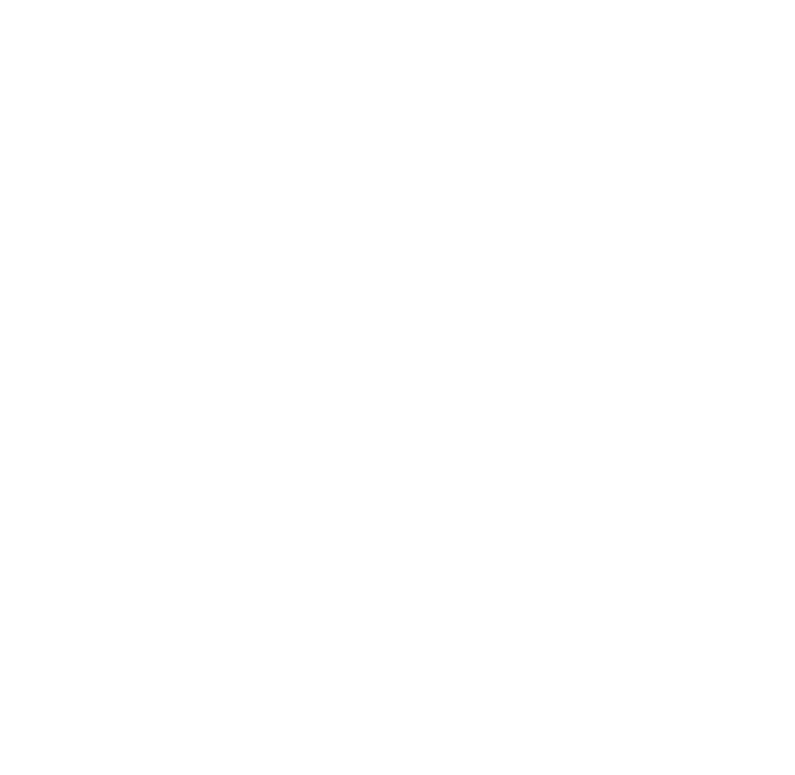

In [33]:
fig, ax = plt.subplots(figsize=(14, 14))

ax.axis("off")
colors = {
    1: "blue",
    2: "orange",
    3: "red",
}

markersizes = {1: 1, 2: 3, 3: 10}

plot = df_phc_plot.plot(
    ax=ax,
    c=df_phc_plot["Nivel"].map(colors),
    markersize=df_phc_plot["Nivel"].map(markersizes)
)

A = [
    -70.1 * np.pi / 180.0,
    -2.5 * np.pi / 180.0,
]  # set latitude & longitude of interest here
B = [
    -70.8 * np.pi / 180.0,
    -2.5 * np.pi / 180.0,
]  # set latitude & longitude (longitude in A +1) of interest here
dx = (6371000) * haversine_distances([A, B])[0, 1]
ax.add_artist(ScaleBar(dx=dx, units="m"))

# add a legend
# handles = [
#     Line2D(
#         [0],
#         [0],
#         marker="o",
#         color="w",
#         markerfacecolor=v,
#         label=f"Category {fsupport.category_dict[k]}",
#         markersize=12,
#     )
#     for k, v in colors.items()
# ]
# ax.legend(
#     title="Health\ninfrastructure",
#     handles=handles,
#     bbox_to_anchor=(0.83, 0.96),
#     loc="upper left",
# )
# ctx.add_basemap(
#     plot, crs="epsg:4326", source=ctx.providers.Stamen.TonerBackground, attribution=""
# )

In [ ]:

df_exposed_health_infra_hospital.sort_values(by=['Per Pobrezanbi', 'Per Desnutricion'], ascending = [True , True])